<a href="https://colab.research.google.com/github/tanmay21-ai/Machine-Learning-Techniques/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C1: Training Data

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
w1=3
w0=4
n=100

X = 10 * np.random.rand(n,)

# y = 4 +3*x + Noise.
y = w0 + w1 * X + np.random.randn(n,)

In [ ]:
print('Shape of training data feature matrix:',X.shape)
print('Shape of training data label vector:',y.shape)

Shape of training data feature matrix: (100,)
Shape of training data label vector: (100,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

In [ ]:
print('Shape of the training data feature matrix:',X_train.shape)
print('Shape of the training data label vector:',y_train.shape)

print('Shape of the test data feature matrix:',X_test.shape)
print('Shape of the test data label vector:',y_test.shape)

Shape of the training data feature matrix: (80,)
Shape of the training data label vector: (80,)
Shape of the test data feature matrix: (20,)
Shape of the test data label vector: (20,)


In [ ]:
X_train[:5]

array([2.48700534, 9.95610029, 0.0350398 , 1.506927  , 0.12979582])

In [ ]:
y_train[:5]

array([12.82001684, 33.84172209,  4.08428789,  6.5708008 ,  4.25396441])

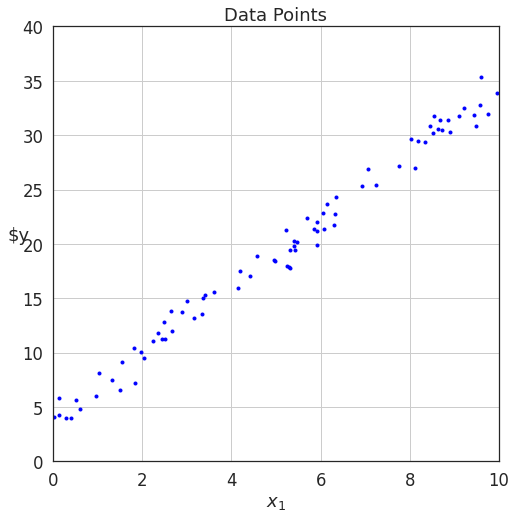

In [ ]:
sns.set_style("white")
f = plt.figure(figsize =(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$",fontsize =18)
plt.ylabel("$y",rotation=0,fontsize=18)
plt.axis([0,10,0,40])

plt.show()

In [ ]:
def add_dummy_feature(x):
  return np.column_stack((np.ones(x.shape[0]),x))

In [ ]:
import unittest
class TestAddDummyFeature(unittest. TestCase):
  def test_add_dummy_feature(self):
    '''Test case function for add_dummy_feature'''
    train_matrix = np.array([[3, 2, 5],[9, 4, 7]])
    train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)
    # test the shape
    self.assertEqual(train_matrix_with_dummy_feature.shape, (2, 4))
    # and contents
    np.testing.assert_array_equal(
    train_matrix_with_dummy_feature,
    np.array( [[1, 3, 2, 5], [1, 9, 4, 7]]))
unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


In [ ]:
add_dummy_feature(np.array([[3, 2], [5, 4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

In [ ]:
print ("Before adding the dummy feature:\n", X_train[:5])
print ("\n")
X_train_with_dummy = add_dummy_feature(X_train)
print ("After adding the dummy feature:\n", X_train_with_dummy[:5,:])

Before adding the dummy feature:
 [2.48700534 9.95610029 0.0350398  1.506927   0.12979582]


After adding the dummy feature:
 [[1.         2.48700534]
 [1.         9.95610029]
 [1.         0.0350398 ]
 [1.         1.506927  ]
 [1.         0.12979582]]


# C2: Model

In [ ]:
def predict(X, w):
    '''Prediction of output label for a given input. 
    Args: 
    X: Feature matrix of shape (n, m+1). 
    w: weight vector of shape (m+1, n) 

    Returns: y: Predicted label vector of shape (n,).
    '''
    # Check to make sure that feature matrix and weight vector have compatible 
    # shapes.

    assert X.shape[-1]==w.shape[0], "X and w don't have compatible dimensions" 
    return X @ w

In [ ]:
import unittest
class TestPredict(unittest.TestCase):
  def test_predict(self):
    '''Test case predict function of linear regression'''
    # set up
    train_matrix = np.array([[1, 3, 2, 5],[1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])

    expected_label_vector = np.array([11, 21])
    # call
    predicted_label_vector = predict(train_matrix, weight_vector)
    # asserts

    # test the shape
    self.assertEqual(predicted_label_vector.shape, (2, ))
    # and contents
    np.testing.assert_array_equal(
    expected_label_vector, predicted_label_vector)
unittest.main(argv=[ ''], defaultTest='TestPredict', verbosity=2, exit=False)

test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Comparison of vectorized and non-vectorized version of model inference

In [ ]:
def non_vectorized_predict(X, w):
  '''Prediction of output label for
  Args:
  X: Feature matrix of shape (n,m+1)
  w: weight vector of shape (m+1,, n)
  Returns:
  y: Predicted label vector of shape (n,)
  '''
  y = []
  for i in range(0, X.shape[0]):
    y_hat_i = 0
    for j in range(0, X.shape[1]):
      y_hat_i += X[i][j]*w[j]
  y.append(y_hat_i)
  return np.array(y)

In [ ]:
#Just a code snippet, does not work
import time
start_time = time.time ()
y_hat_vectorized = predict(X_train, w)
end_time = time.time()

print('Total time incurred in vectorized inference is: %0.6f s'%(end_time - start_time))

start_time = time.time( )
y_hat_non_vectorized = non_vectorized_predict(X_train, w)
end_time = time.time()

print('Total time incurred in non-vectorized inference is: %0.6f s'%(end_time - start_time))
np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

# C3: Loss

In [ ]:
def loss(X, y, w):
  '''Calculates loss for a model based on known labels.
  Args:
  X: Feature matrix for given inputs.
  y: Output label vector as predicted by the given model.
  w: Weight vector
  Returns:
  Loss
  '''
  e = predict(X, w) - y
  return (1/2) * (np.transpose (e) @ e)

In [ ]:
import unittest
class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):
    '''Test case for loss function of linear regression'''
    # set up
    feature_matrix = np.array([[1, 3, 2, 5],[1, 9, 4, 7]])
    weight_vector = np.array([1, 1,
    1,
    1])
    label_vector = np.array( [ 6, 11])
    expected_loss = np.array ([62.5])
    # call
    loss_value = loss (feature_matrix, label_vector, weight_vector)
    # asserts
    # test the shape
    self.assertEqual(loss_value.shape, ())
    # and contents
    np.testing.assert_array_equal(expected_loss, loss_value)
unittest.main(argv=[''], defaultTest='TestLossFunction', verbosity=2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


# C4: Optimization

Let's generate taining data with 100 examples with linear regression model of known parameters.
We will use this data to test optimization procedure, where we compare the estimated weight vectors with the actual weight vector.

In [ ]:
'''X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess (X, y)
'''

'X, y = generate_data(100)\nX_train, X_test, y_train, y_test = preprocess (X, y)\n'

In [ ]:
def normal_equation(X, y):
  '''Estimates parameters of the linear regression model with normal equation.
  Args:
  X: Feature matrix for given inputs.
  y: Actual label vector.
  Returns:
  Weight vector
  '''
  return np.linalg.pinv(X) @ y

# Gradient descent (GD)
GD is implemented as follows:

  Randomly initialize w to 0.

  Iterate until convergence:

  Calculate partial derivative of loss w.r.t. weight vector.

  Calculate new values of weights.

  Update weights to new values simultaneously.
  

We use number of epochs as a convergence criteria in this implementation.

In [ ]:
def calculate_gradient(X, y, w):
  '''Calculates gradients of loss function w.r.t weight vector on training set.
  Arguments:
  X: Feature matrix for training data.
  y: Label vector for training data.
  w: Weight vector
  Returns:
  A vector of gradients.
  '''
  return np.transpose (X) @ (predict(X, w) - y)

Now will test gradient decent algo.

In [ ]:
class TestCalculateGradient(unittest.TestCase):
  def test_calculate_gradient(self):
    '''
    Test case for gradient calculation.
    '''
    # set up
    feature_matrix = np.array([[1, 3, 2, 5],[1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])

    label_vector = np.array([6, 11])

    expected_grad = np.array([15, 105, 50, 95])

    # call
    grad = calculate_gradient(feature_matrix, label_vector, weight_vector)
    # asserts

    # test the shape
    self.assertEqual(grad.shape, (4, ))

    # and contents
    np.testing.assert_array_almost_equal(expected_grad, grad, decimal=0)
    
unittest.main(argv=[''], defaultTest='TestCalculateGradient', verbosity=2, exit=False)

In [ ]:
def update_weights(w, grad, lr):
  '''Updates the weights based on the gradient of loss function.
  Weight updates are carried out with the following formula:
  w_new := w_old - lr * grad
  Args:
  1. w: weight vector
  2. grad: gradient of loss w.r.t. w
  3. lr: learning rate
  Returns:
  Updated weight vector
  '''
  return (w - lr*grad)